# Feedforward Neural Network (FFNN)

- Implementation of the forward propagation of a feedforward neural network (FFNN)
- Consisting of three layers, in which the hidden layer has $K$ neurons.

In [1]:
# Library :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Extract the data

In [2]:
# Read the data and create DataFrame :
df = pd.read_csv("data_ffnn_3classes.txt", header=None, sep=' ', names=['X1', 'X2', 'Y'])

# print the DataFrame & columns :
print(df)
print(df.columns.values)

        X1      X2    Y
0   1.9643  4.5957  1.0
1   2.2753  3.8589  1.0
2   2.9781  4.5651  1.0
3   2.9320  3.5519  1.0
4   3.5772  2.8560  1.0
..     ...     ...  ...
66  4.7483  0.7251  2.0
67  4.2916  1.0857  2.0
68  4.7126  0.8640  2.0
69  4.1005  1.0058  2.0
70  3.9601  1.4057  2.0

[71 rows x 3 columns]
['X1' 'X2' 'Y']


## Create the matrix X and Y

In [3]:
# Create Y array :
df_x = df.drop('Y', inplace=False, axis=1)

new = pd.get_dummies(df['Y'])
Y = np.array(new)

print("Y shape : ",Y.shape)

Y shape :  (71, 3)


## Define N, I and J :

In [4]:
# Number of features :
N = df_x.shape[1]
# Number of training examples :
I = df_x.shape[0]

# Number of dimension of y variables
J = new.shape[1]

print("N = ",N," features and I = ",I," training examples and J = ",J)

N =  2  features and I =  71  training examples and J =  3


In [5]:
# Create the matrix X :
liste = list()
for i in range(N):
    liste.append(df_x.iloc[:,i])
X = np.array(liste)
X = X.T
print("X shape : ",X.shape)

X shape :  (71, 2)


## Define the function F, G and Elementwise inversion

In [6]:
# sigmoid function :
def sigmoid(ma):
    return 1/(1 + np.exp(-ma))

    
# the derivate functions :
def dF(m2):
    c = m2 * (1 - m2)
    return c

## Forward propagation (FWP)

### Choose randomly the parameter $\theta$ :

In [7]:
def init_params(k):
    V = np.random.random((N+1,k))
    W = np.random.random((k+1,J))
    return W, V

In [8]:
def FWP(X, Y, V, W):
    # add the intercept
    bias = np.ones((I,1))
    X_b = np.c_[bias,X]
    
    # Linear operation with V
    X_bb = np.dot(X_b, V)
    
    # First Activation function :
    f = sigmoid(X_bb)
    
    # Add intercept :
    f_b = np.c_[bias, f]
    
    # Linear op with W
    f_bb = np.dot(f_b, W)
    
    # Second activation function :
    g = sigmoid(f_bb)
    return g, f, f_b, X_b


# algorithm for finding labels :
def find_label(matrix):
    label = np.zeros((I,1))
    for i in range(I):
        label[i] = np.argmax(matrix[i])
    return label

### Sum of Squared Errors (SSE)

$$ \frac{1}{2} \sum^{I}_{i=1}\sum^{J}_{j=1}(g^{(i)}_j - y^{(i)}_j)^2 $$

In [9]:
# Cost function (SSE) : 
def Cost_function(preds, y):
    s = 0.0
    for i in range(I):
        for j in range(J):
            tmp = preds[i,j] - y[i,j]
            s = s + np.power(tmp, 2)
    return s*0.5

## Part 2 :

### Graph representation of the training Data :

<AxesSubplot:xlabel='X1', ylabel='X2'>

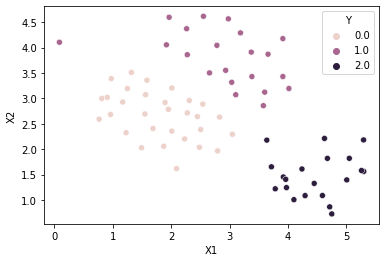

In [10]:
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['Y'])

## Back Propagation (BP)

- pour w : k=0,...,K en ligne et j=1,...,J en colonne
- pour V : n=0,...,N et k=1,...,K en 

In [11]:
# dérivées partielles :
def Gradient_V(preds, f, x_b, y, w, k, n):
    s = 0
    for i in range(I):
        for j in range(J):
            s += (preds[i,j] - y[i,j]) * dF(preds[i,j]) * w[k+1,j] * dF(f[i,k]) * x_b[i,n]
    return s
    
    
def Gradient_W(preds, f_, y, j, k):
    s = 0
    for i in range(I):
        s += (preds[i,j]-y[i,j]) * dF(preds[i,j]) * f_[i,k]
    return s

In [12]:
# Update the parameters W and V :

def update_params(a1, a2, w, v, preds, f, f_, y, x_b):
    for k in range(K+1):
        for j in range(J):
            w[k,j] = w[k,j] - (a1 * Gradient_W(preds, f_, y, j, k))

    for n in range(N+1):
        for k in range(K):
            v[n,k] = v[n,k] - (a2 * Gradient_V(preds, f, x_b, y, w, k, n))
    
    return w, v

## Test of the Back Propagation :

In [17]:
iteration = 10000

K = 5
alpha1 = 0.02
alpha2 = 0.02
score = list()

W, V = init_params(K)

for itr in range(iteration+1):
    predictions, f, f_, x_ = FWP(X, Y, V, W)
    
    score.append(Cost_function(predictions, Y))
    
    W, V = update_params(alpha1, alpha2, W, V, predictions, f, f_, Y, x_)

### Algorithm Converges :

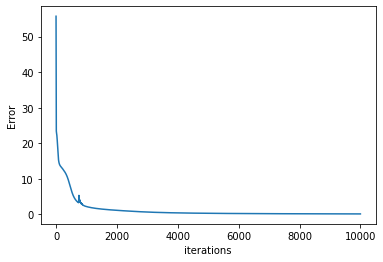

In [18]:
plt.xlabel('iterations')
plt.ylabel('Error')
plt.plot(range(iteration+1), np.array(score))

In [20]:
E = np.array(score)
E

array([55.71904981, 50.07809354, 42.89523376, ...,  0.11304263,
        0.11302839,  0.11301415])

### The G Matrix :

In [34]:
predictions

array([[2.54893081e-03, 9.99236256e-01, 4.57077225e-03],
       [5.36994925e-03, 9.97808661e-01, 5.49166902e-03],
       [2.43246522e-03, 9.99371627e-01, 4.09101394e-03],
       [6.91723271e-03, 9.97092927e-01, 5.51055468e-03],
       [1.42849186e-01, 7.67506231e-01, 1.18561752e-02],
       [2.90275595e-03, 9.96916454e-01, 1.03056834e-02],
       [5.88517507e-03, 9.97608399e-01, 5.41997665e-03],
       [2.43681632e-03, 9.99374620e-01, 4.06773782e-03],
       [2.87281043e-03, 9.99067119e-01, 4.81684909e-03],
       [2.45297746e-03, 9.99336638e-01, 4.23505076e-03],
       [2.72911834e-03, 9.99160097e-01, 4.63789567e-03],
       [1.59851666e-01, 8.82187587e-01, 6.48259852e-03],
       [4.45833114e-03, 9.98237473e-01, 5.43474395e-03],
       [2.65114995e-03, 9.99175641e-01, 4.68792497e-03],
       [1.53786836e-02, 9.92458747e-01, 5.85012920e-03],
       [2.48311862e-03, 9.99318218e-01, 4.27968011e-03],
       [2.64081078e-03, 9.99212551e-01, 4.53497781e-03],
       [3.21147197e-03, 9.98674

### The Optimal parameter values for  V and W :

In [18]:
opti_w = W
opti_v = V
print("V = ",V)
print("W = ",W)

V =  [[-15.52700977   0.6557178   -2.65303268   0.82774079   0.82832602]
 [  1.61281671   0.98310031   4.25138748   1.10719485   3.99052645]
 [  3.68968783   1.54077445  -5.2963877   -0.11292707  -0.90605064]]
W =  [[  1.53246023  -1.80986075  -1.50625529]
 [-11.07899552  12.2475461   -1.25643312]
 [  1.41129152  -1.2864716   -1.09718844]
 [ -9.44336854  -4.2477695    8.95915654]
 [ -0.0225145   -0.5650785   -0.72172276]
 [  3.15238185  -3.02332795  -1.15837312]]


### Comparison between $\hat{y}$  and $y$ :

In [19]:
predicted_output = np.around(predictions)
predicted_output = predicted_output
comp = predicted_output == Y
print(comp)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True

### Test Prediction :

In [20]:
X_test = np.array([[2.0,2.0],
                   [4.0,4.0],
                   [4.5,1.5]])

# number of test data :
I = 3

# fwp :
results = FWP(X_test, Y, opti_v, opti_w)


print(results[0])

# some transformation :
estimated_output = find_label(results[0])
estimated_output = estimated_output.reshape(3,)

[[9.97283353e-01 1.36679702e-03 1.24956554e-02]
 [6.84194660e-03 9.96015369e-01 3.26840776e-03]
 [1.72260758e-02 3.78294784e-05 9.87877601e-01]]


### Graph :

<AxesSubplot:>

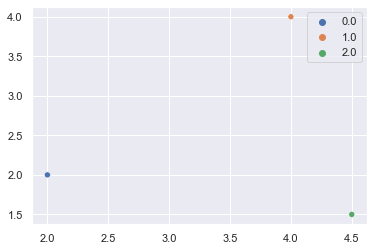

In [21]:
sns.set_theme(style='darkgrid')
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=estimated_output, palette='deep')